## Proyecto 3. Entrega 3
### Regresion Lineal
Diego Duarte 22075 - José Marchena 22398 - Andrés Kou 22305 - Esteban Zambrano 22119

#### Importaciones

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from pipeline import crear_pipeline_regresion_lineal
from error_metrics import calculate_errors, diff_analysis

#### Carga y preparación de datos

In [3]:
# Cargar dataset
df = pd.read_csv("../DataFinal.csv")

# Verificar columnas categóricas
categoricas = ['Grupo de Edad', 'Año']
df[categoricas] = df[categoricas].astype(str)  # Convertir a string para OneHotEncoder

# Eliminar filas con NaN en la variable objetivo
df = df[df['Total Nacimientos'].notna()]

#### Variables predictoras (X) y objetivo (y)

In [4]:
# Variable objetivo
y = df['Total Nacimientos']

# Variables predictoras: eliminar la columna objetivo
X = df.drop(columns=['Total Nacimientos'])

# One-hot encoding para Año y Grupo de Edad
X = pd.get_dummies(X, columns=categoricas, drop_first=True)

#### Divición entre entrenamiento y prueba

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Crearcion y entrenamiento del pipeline

In [6]:
modelo = LinearRegression()
pipeline = crear_pipeline_regresion_lineal(modelo)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

#### Evaluacion del modelo

Regresión Lineal Multivariable:
MAE: 14.72218998743377
MSE: 386.03829532265905
RMSE: 19.647857270518305
R²: 0.9999996790092494


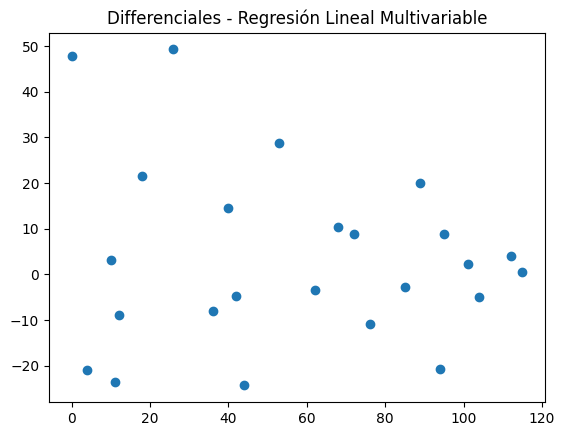

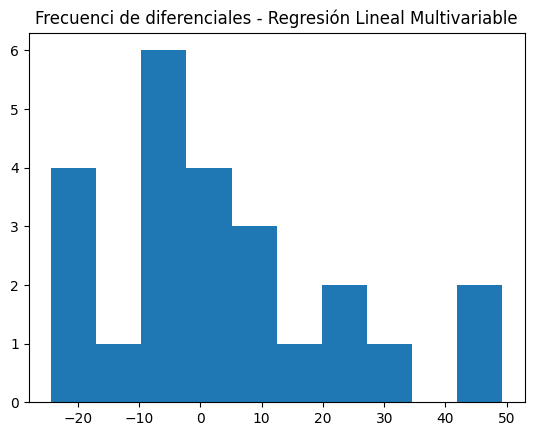

In [7]:
# Predecir
y_pred = pipeline.predict(X_test)

# Calcular métricas
calculate_errors(y_pred, y_test, "Regresión Lineal Multivariable")

# Analizar diferencias
diff_analysis(y_pred, y_test, "Regresión Lineal Multivariable")